# Decision Tree Classification

## Import Required Libraries

In [2]:
# Import Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

## Load and Explore the Dataset

In [12]:
# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target

data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Split the Dataset

In [13]:
X = data.iloc[:, :-1]
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the Decision Tree Classifier

In [5]:
# Train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Evaluate the Model

Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%


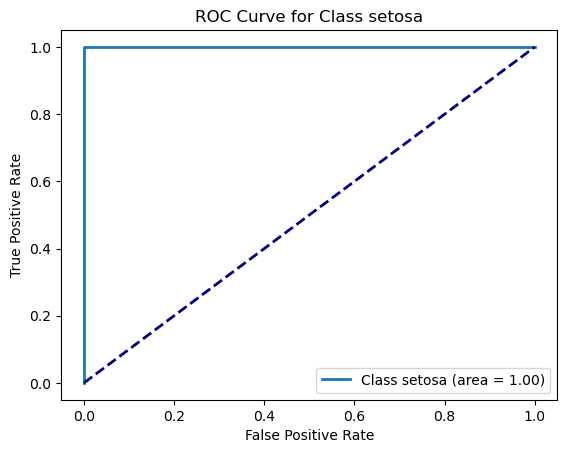

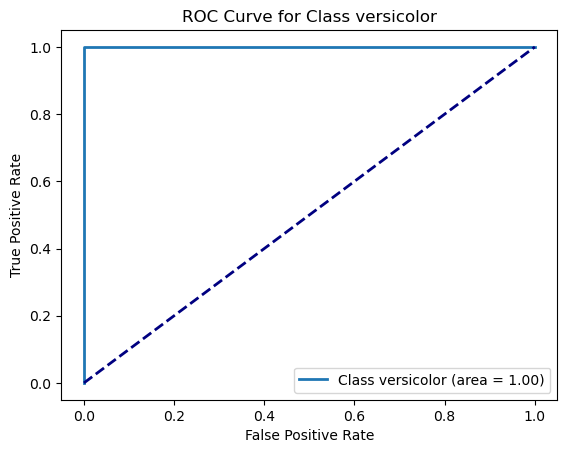

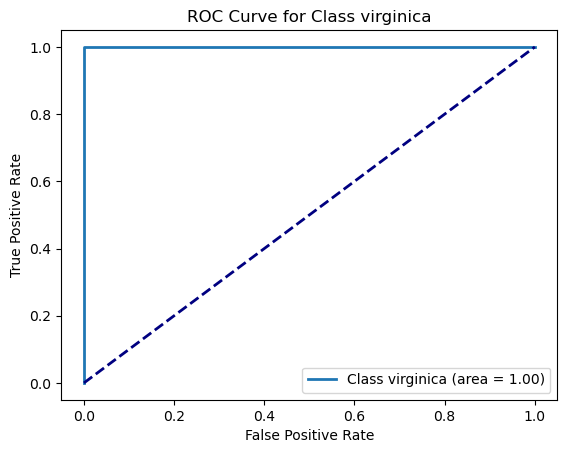

In [14]:
# Make predictions and evaluate the model
from sklearn.metrics import precision_score, recall_score, roc_curve, auc, PrecisionRecallDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
import numpy as np

y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")

# Compute ROC curve and AUC for each class
for i in range(len(iris.target_names)):
    fpr, tpr, _ = roc_curve(y_test == i, y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve for each class
    plt.figure()
    plt.plot(fpr, tpr, lw=2, label=f'Class {iris.target_names[i]} (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Class {iris.target_names[i]}')
    plt.legend(loc='lower right')
    plt.show()

# Plot Precision-Recall curve
# PrecisionRecallDisplay.from_estimator(clf, X_test, y_test)
# plt.title('Precision-Recall Curve')
# plt.show()

## Visualize the Decision Tree

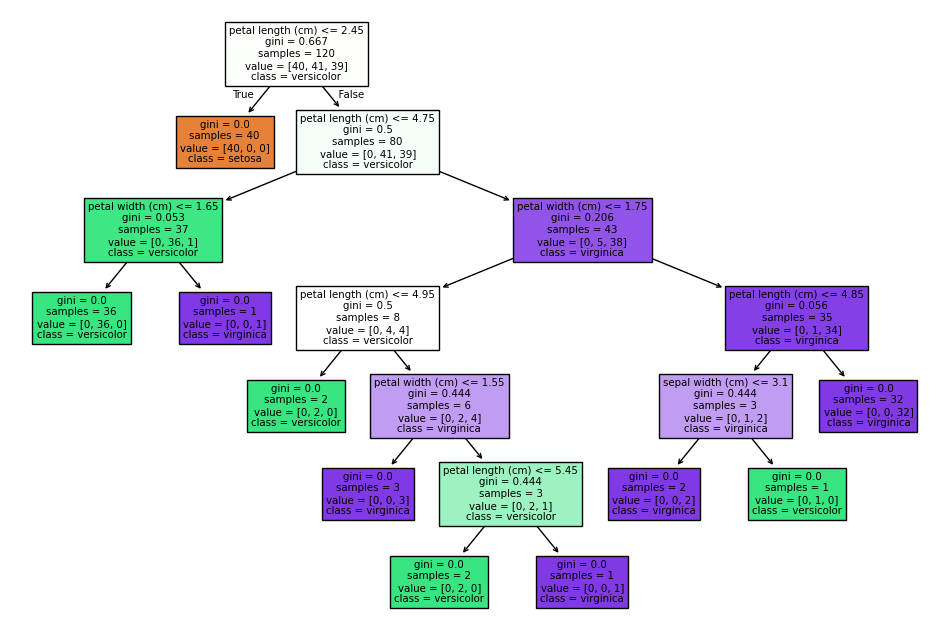

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()